<a href="https://colab.research.google.com/github/tjohanne42/deep_q_learning/blob/main/train_deep_q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/tjohanne42/deep_q_learning.git
!ls

Cloning into 'deep_q_learning'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [13]:
!pip install Box2d
!pip install box2d-py

     |████████████████████████████████| 1.3 MB 4.3 MB/s 


In [11]:
!pip show box2d-py

Name: box2d-py
Version: 2.3.8
Summary: Python Box2D
Home-page: https://github.com/openai/box2d-py
Author: Ken Lauer
Author-email: sirkne@gmail.com
License: zlib
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: 


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


episode:  0 score: -301.00  average score -301.00
episode:  1 score: -131.34  average score -216.17
episode:  2 score: -151.65  average score -194.67
episode:  3 score: -489.36  average score -268.34
episode:  4 score: -128.27  average score -240.33
episode:  5 score: -138.04  average score -223.28
episode:  6 score: -153.36  average score -213.29
episode:  7 score: -404.23  average score -237.16
episode:  8 score: -135.99  average score -225.92
episode:  9 score: -163.97  average score -219.72


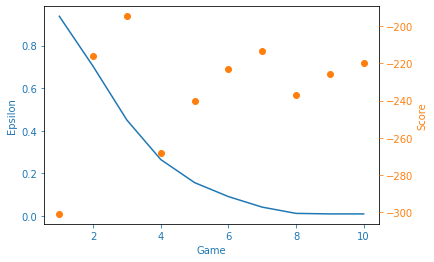

In [1]:
import os
# for keras the CUDA commands must come before importing the keras libraries
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import gym
from gym import wrappers
import numpy as np
from deep_q_learning.ddqn import DDQNAgent
from deep_q_learning.utils import plotLearning

In [ ]:
env = gym.make('LunarLander-v2')
ddqn_agent = DDQNAgent(alpha=0.0005, gamma=0.99, n_actions=4, epsilon=1.0,
              batch_size=64, input_dims=8)
n_games = 501
ddqn_agent.load_model()
ddqn_scores = []
eps_history = []
# env = wrappers.Monitor(env, "tmp/lunar-lander-ddqn-2",
#                         video_callable=lambda episode_id: True, force=True)

for i in range(n_games):
    done = False
    score = 0
    observation = env.reset()
    while not done:
        action = ddqn_agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        score += reward
        ddqn_agent.remember(observation, action, reward, observation_, int(done))
        observation = observation_
        ddqn_agent.learn()
    eps_history.append(ddqn_agent.epsilon)

    ddqn_scores.append(score)

    avg_score = np.mean(ddqn_scores[max(0, i-100):(i+1)])
    print('episode: ', i,'score: %.2f' % score,
          ' average score %.2f' % avg_score)

    if i % 10 == 0 and i > 0:
        ddqn_agent.save_model()

filename = 'lunarlander-ddqn.png'

x = [i+1 for i in range(n_games)]
plotLearning(x, ddqn_scores, eps_history, filename)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


episode:  0 score: 2.55  average score 2.55
episode:  1 score: -120.77  average score -59.11
episode:  2 score: -96.44  average score -71.55
episode:  3 score: -50.79  average score -66.36
episode:  4 score: -264.48  average score -105.99
episode:  5 score: -557.75  average score -181.28
episode:  6 score: -20.67  average score -158.34
episode:  7 score: -57.81  average score -145.77
episode:  8 score: -277.98  average score -160.46
episode:  9 score: -182.34  average score -162.65
episode:  10 score: -105.73  average score -157.47
episode:  11 score: -162.52  average score -157.89
episode:  12 score: -143.39  average score -156.78
episode:  13 score: -95.86  average score -152.43
episode:  14 score: -112.10  average score -149.74
episode:  15 score: -132.54  average score -148.66
episode:  16 score: -135.47  average score -147.89
episode:  17 score: -69.75  average score -143.55
episode:  18 score: -142.99  average score -143.52
episode:  19 score: -103.69  average score -141.53
episo

In [ ]:
filename = 'lunarlander-ddqn.png'

x = [i+1 for i in range(n_games)]
plotLearning(x, ddqn_scores, eps_history, filename)